## Sodankyla

### Creation of Pandas Dataframe

In [ ]:
from scripts.FSC_dataframe import *

# %matplotlib ipympl

# dirpaths = ['../data_store/data/sodankyla_full/','../data_store/data/nosnow_highref_amy/']
dirpaths = ['../data_store/data/sodankyla_full/']
csvpath = 'snow_cam_details.csv'

for i, dirpath in enumerate(dirpaths):
    if i == 0:
        df, df_pure = FSC_dataframe(dirpath, csvpath, width=.05, height=.05)
    else:
        df_, df_pure_ = FSC_dataframe(dirpath, csvpath, width=.05, height=.05)
        df = pd.concat([df, df_], axis=0)
        df_pure = pd.concat([df_pure, df_pure_], axis=0)
df

Beam 1 in file 4 has been skipped because of no data.
Beam 2 in file 4 has been skipped because of no data.
Beam 3 in file 4 has been skipped because of no data.
Beam 4 in file 4 has been skipped because of no data.
Beam 5 in file 4 has been skipped because of no data.
Beam 6 in file 4 has been skipped because of no data.
No beams have data in file 4, cannot regress.
Beam 1 in file 5 has been skipped because of no data.
Beam 2 in file 5 has been skipped because of no data.
Beam 3 in file 5 has been skipped because of no data.
Beam 4 in file 5 has been skipped because of no data.
Beam 1 in file 7 has been skipped because of no data.
Beam 2 in file 7 has been skipped because of no data.
Beam 3 in file 7 has been skipped because of no data.
Beam 4 in file 7 has been skipped because of no data.
Beam 5 in file 7 has been skipped because of no data.
Beam 6 in file 7 has been skipped because of no data.
No beams have data in file 7, cannot regress.
Beam 3 in file 8 has been skipped because of

In [2]:
clean_df = df_pure[df_pure['msw_flag'] < 2]

### Statistical Glance

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 0
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pvpg            24 non-null     float64
 1   mean_Eg_strong  24 non-null     float64
 2   mean_Eg_weak    23 non-null     float64
 3   mean_Ev_strong  24 non-null     float64
 4   mean_Ev_weak    23 non-null     float64
 5   msw_flag        24 non-null     float64
 6   night_flag      24 non-null     float64
 7   asr             24 non-null     float64
 8   FSC             24 non-null     float64
 9   Tree Snow       24 non-null     float64
 10  Joint Snow      24 non-null     float64
dtypes: float64(11)
memory usage: 2.2 KB


In [2]:
df_pure.head()

,pvpg,mean_Eg_strong,mean_Eg_weak,mean_Ev_strong,mean_Ev_weak,msw_flag,night_flag,asr,FSC,Tree Snow,Joint Snow
0,0.038846,3.634023,1.198126,0.602533,0.346641,1.000000,1.0,0.366850,1.0,0.0,1.0
1,0.344606,1.035700,0.424717,0.910730,0.378241,2.696701,0.0,0.186152,1.0,1.0,2.0
2,1.032511,0.352601,0.124356,0.213841,0.160356,2.272537,0.0,0.039992,1.0,0.0,1.0
3,0.831393,2.580798,0.846353,0.431859,0.358542,1.010336,0.0,0.257220,1.0,0.0,1.0
4,0.054266,2.946372,0.736324,0.358108,0.264183,0.462264,0.0,0.249534,1.0,0.0,1.0


In [8]:
df.describe()

,File Number,pvpg,mean_Eg_strong,mean_Eg_weak,mean_Ev_strong,mean_Ev_weak,msw_flag,night_flag,asr
count,23.000000,23.000000,23.000000,22.000000,23.000000,22.000000,23.000000,23.000000,23.000000
mean,16.391304,0.785563,2.329018,0.715239,0.567271,0.328744,0.916740,0.391304,0.231732
std,10.882593,0.347100,1.629436,0.459035,0.341207,0.122649,0.996288,0.499011,0.168069
min,0.000000,0.218932,0.260734,0.090498,0.126290,0.189513,0.000000,0.000000,0.017572
25%,6.500000,0.526784,0.998561,0.251957,0.389122,0.252141,0.000000,0.000000,0.096824
50%,17.000000,0.770523,2.166465,0.640000,0.501309,0.292569,1.000000,0.000000,0.194624
75%,24.500000,1.037282,3.837193,1.133937,0.659664,0.365419,1.456522,1.000000,0.321076
max,35.000000,1.312406,5.823964,1.506051,1.815182,0.724196,3.000000,1.000000,0.563207


<Axes: >

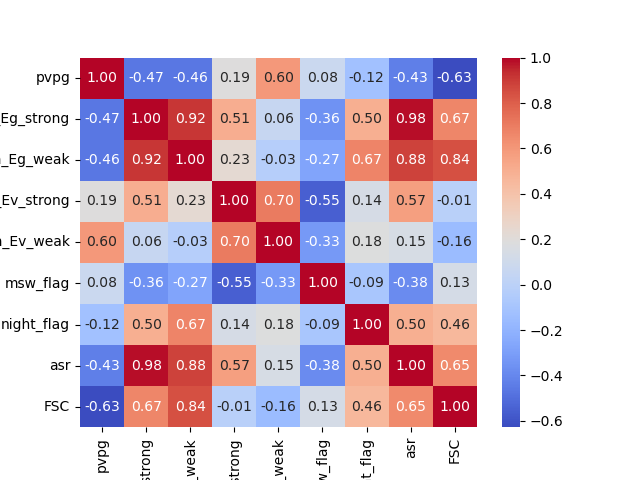

In [6]:
# Correlation heatmap
sns.heatmap(clean_df.drop(['Joint Snow','Tree Snow'],axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")

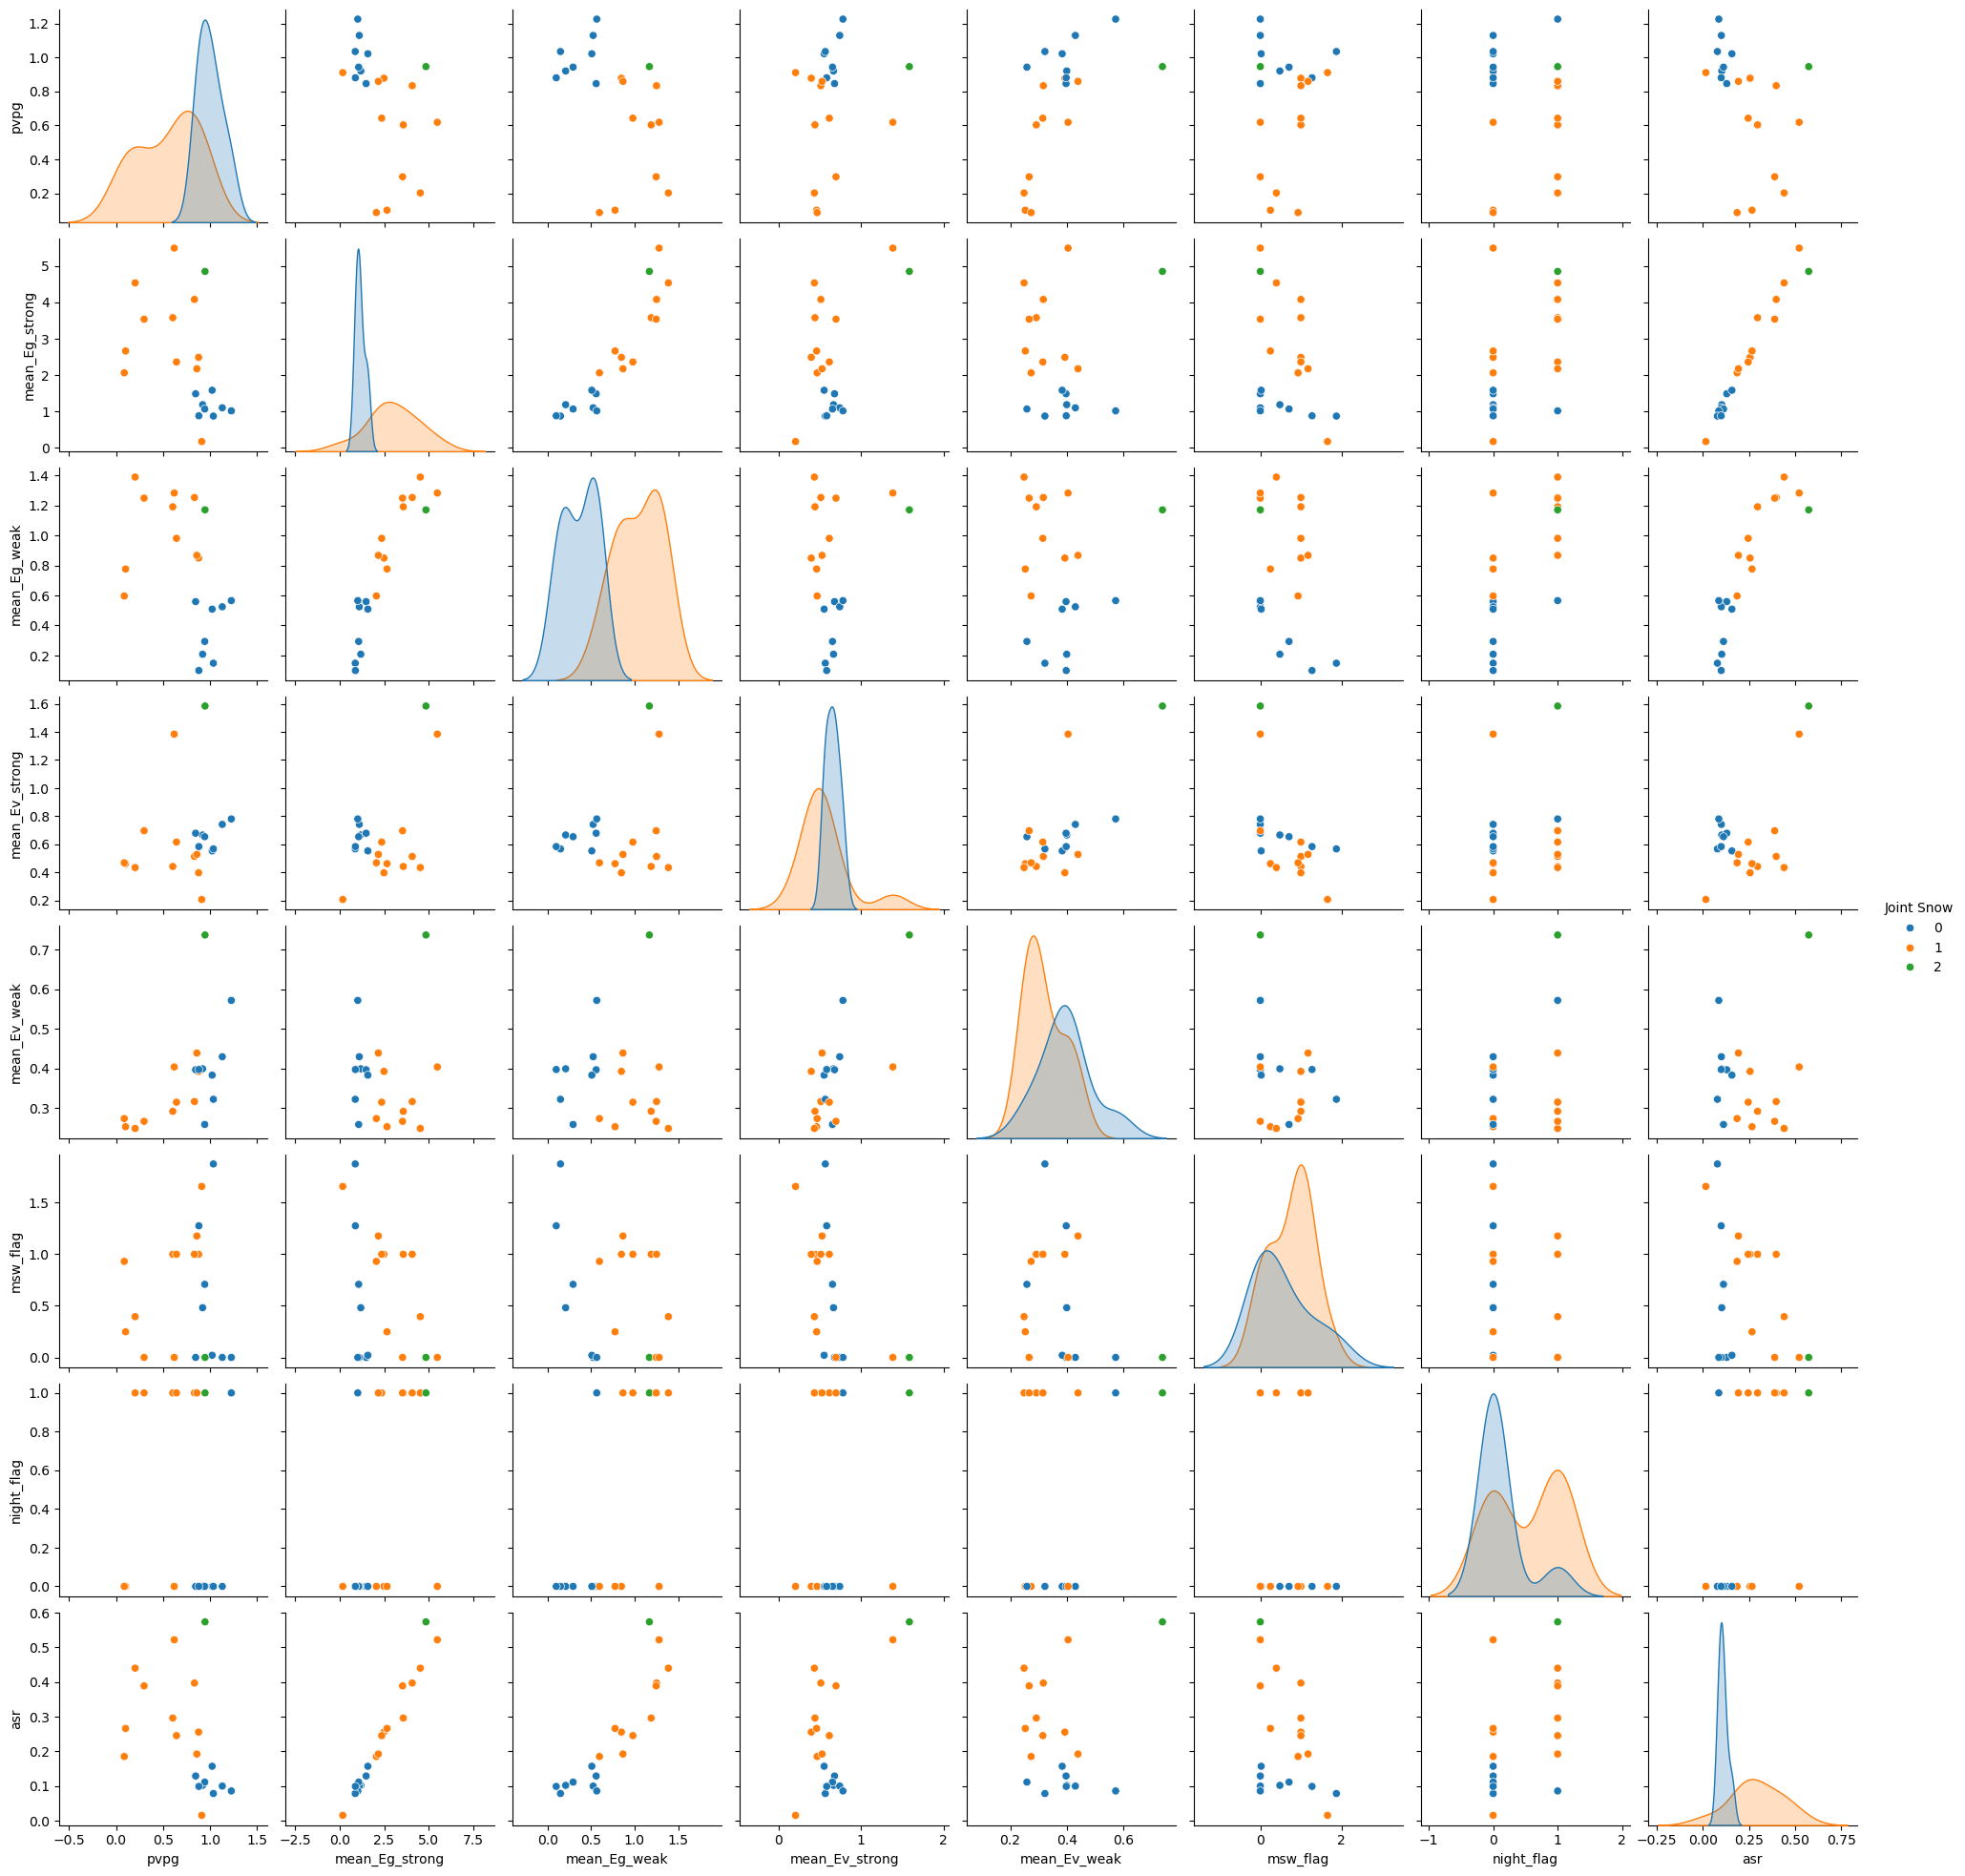

In [4]:
# Pairplot
hue = 'Joint Snow'

# setting the figure size
# width = 20
# height = 8
# sns.set(rc = {'figure.figsize':(width,height)})
sns.pairplot(clean_df, diag_kind='kde', hue=hue)
# plt.savefig('./images/msw_flagged_stats/6kmbox.png')

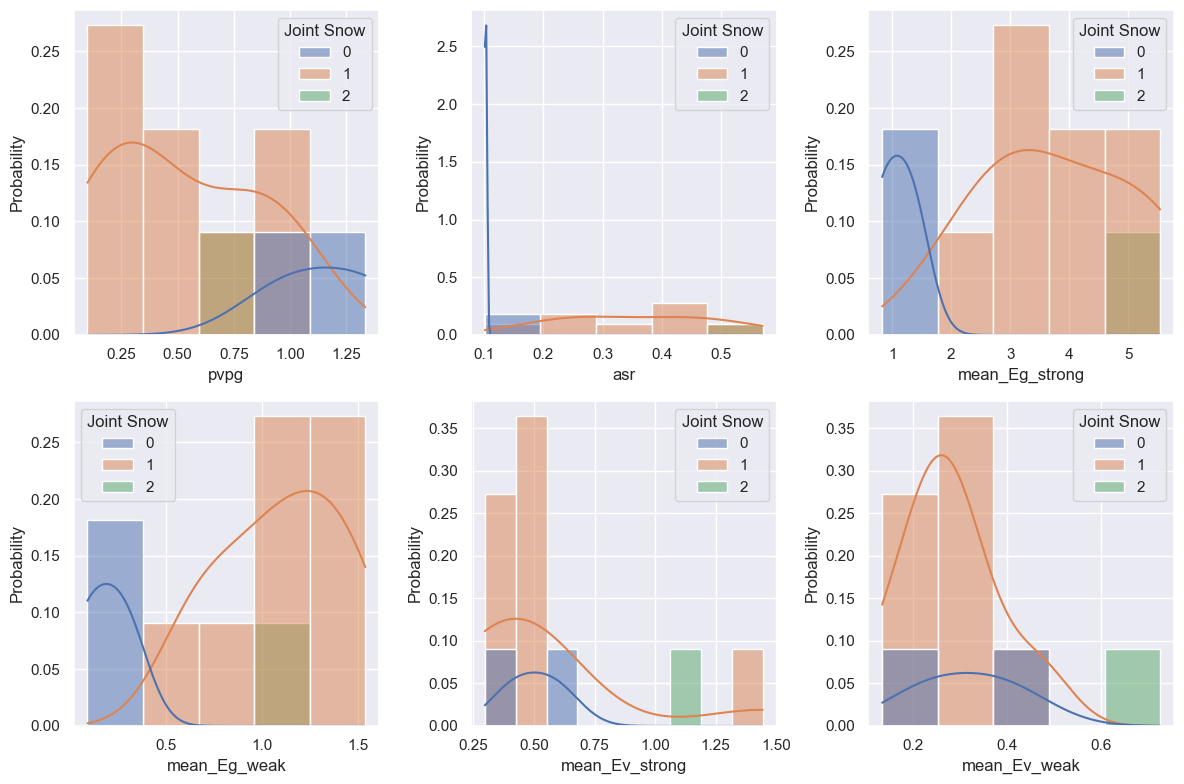

In [17]:
# Distribution Plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

hue = 'Joint Snow'
stat = 'probability'
f = ['pvpg','asr','mean_Eg_strong','mean_Eg_weak','mean_Ev_strong','mean_Ev_weak']
i = 0
j = 0

for x in f:
    sns.histplot(df[df['msw_flag'] < 2], x=x, hue=hue, kde=True, stat=stat,ax=axes[i % 2, j % 3])
    j += 1
    if j == 3:
        i += 1

# Adjust layout
plt.tight_layout()

# Show plot
plt.show
plt.savefig('./images/msw_flagged_stats/6kmbox_hist.png')

C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is depreca

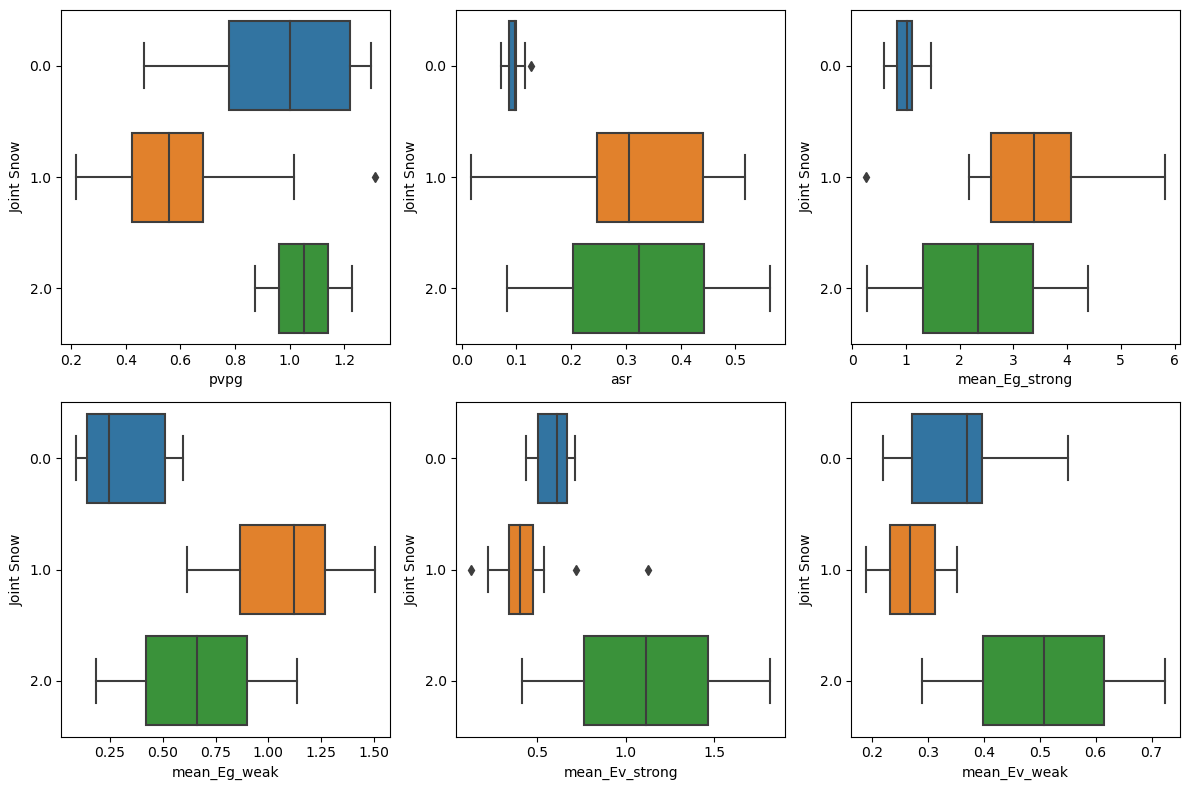

In [20]:
# Violin plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

hue = 'Joint Snow'

# Distribution plots
sns.boxplot(df, x='pvpg', y=hue, ax=axes[0, 0])
sns.boxplot(df, x='asr', y=hue, ax=axes[0, 1])
sns.boxplot(df, x='mean_Eg_strong', y=hue, ax=axes[0, 2])
sns.boxplot(df, x='mean_Eg_weak', y=hue, ax=axes[1, 0])
sns.boxplot(df, x='mean_Ev_strong', y=hue, ax=axes[1, 1])
sns.boxplot(df, x='mean_Ev_weak', y=hue, ax=axes[1, 2])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is depreca

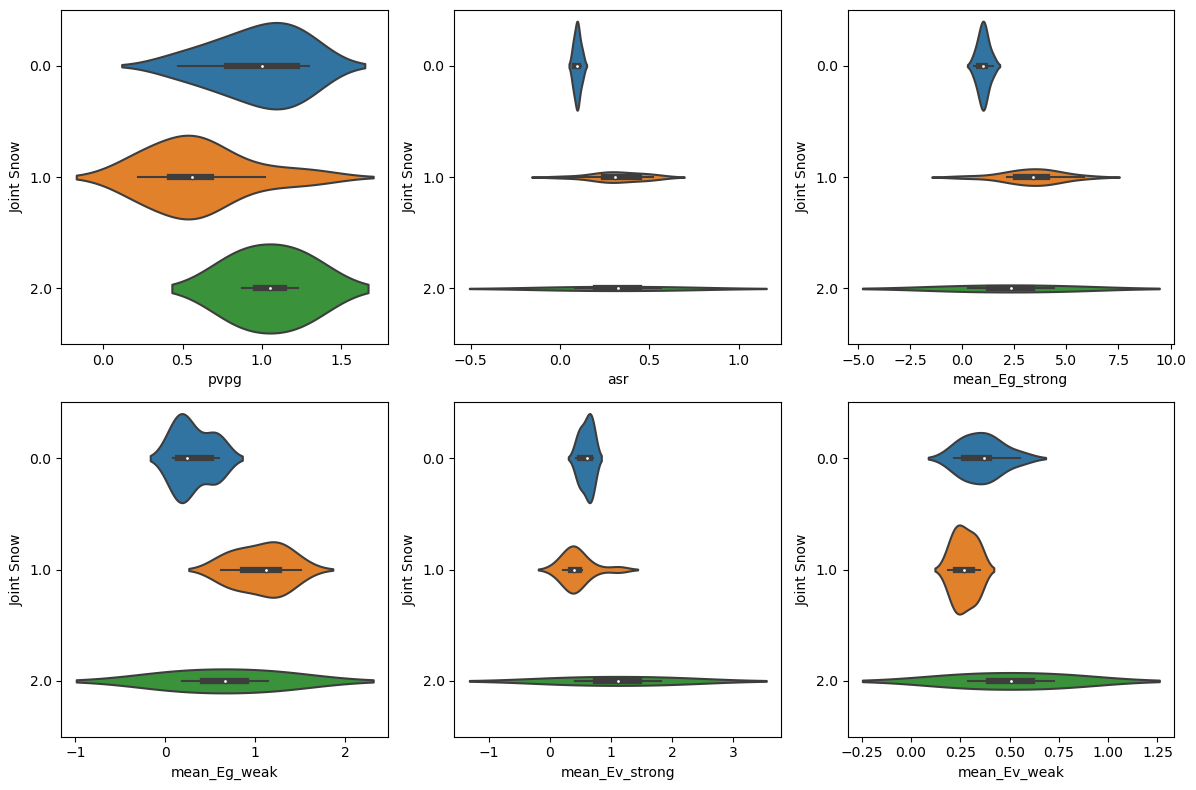

In [19]:
# Violin plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

hue = 'Joint Snow'

# Distribution plots
sns.violinplot(df, x='pvpg', y=hue, ax=axes[0, 0])
sns.violinplot(df, x='asr', y=hue, ax=axes[0, 1])
sns.violinplot(df, x='mean_Eg_strong', y=hue, ax=axes[0, 2])
sns.violinplot(df, x='mean_Eg_weak', y=hue, ax=axes[1, 0])
sns.violinplot(df, x='mean_Ev_strong', y=hue, ax=axes[1, 1])
sns.violinplot(df, x='mean_Ev_weak', y=hue, ax=axes[1, 2])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Kenttarova

In [ ]:
# from scripts.FSC_dataframe import *

# %matplotlib ipympl

# dirpath = '../data/kenttarova_cam/'
# csvpath = 'snow_cam_details.csv'

# df, df_pure = FSC_dataframe(dirpath, csvpath)